In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
import os
import json
import gc
from pathlib import Path
import random

import cv2
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import webcolors
from PIL import Image, ImageDraw

from minimal.layout import InputLayout
from minimal.imaging import draw_plan
from minimal.gen import run_model

%matplotlib inline

In [3]:
from minimal import sample_graphs

from pregen.premade import premade_graphs
from pregen import signature as sg

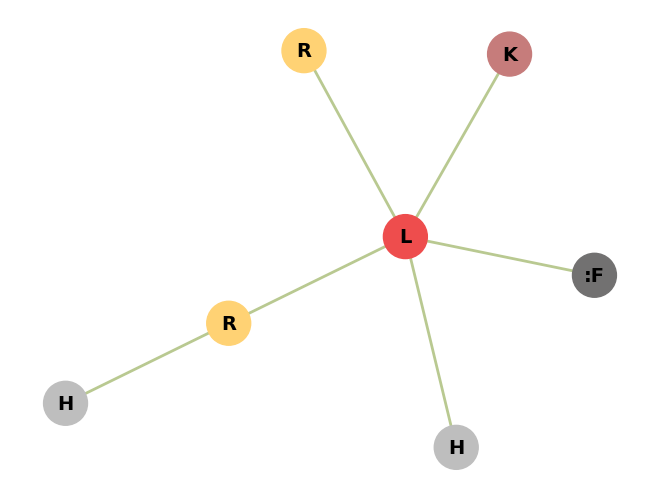

In [85]:
layout = sg.find_closest_graph(sample_graphs.one())
layout.draw()

In [84]:
folder = Path("plibrary") / sg.graph_folder_name(layout)
meta_path = folder / "meta.json"
with open(meta_path) as f:
    meta = json.load(f)

count = meta['count']
i = random.randint(1, count)
filepath = folder / f"{i}.pth"
masks = torch.load(filepath)
masks.shape

torch.Size([9, 64, 64])

In [19]:
# print(len(premade_graphs))
# for g in premade_graphs:
#     path = "plibrary/" + sg.graph_folder_name(g)
#     if not Path(path).is_dir():
#         print(path)

In [20]:
# prev = {}
# for i, g in enumerate(premade_graphs):
#     s = sg.graph_folder_name(g)
#     if s in prev:
#         print(prev[s], s)
#         print(i)
#     prev[s] = i